## Khai báo thư viện

In [1]:
import requests
import pandas as pd
import numpy as np

## Crawl dữ liệu điểm thi 2022 và xử lý

In [2]:
file = requests.get('https://raw.githubusercontent.com/anhdung98/diem_thi_2022/main/diem_thi_thpt_2022.csv').text

In [3]:
file = [line.split(',') for line in file.splitlines()]

In [4]:
df = pd.DataFrame(file[1:], columns=file[0])

In [5]:
df.head()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd
0,01000001,3.6,5.0,4.0,,,,2.75,6.0,8.75
1,01000002,8.4,6.75,7.6,,,,8.5,7.5,8.25
2,01000003,5.8,7.5,5.0,,,,7.25,5.5,8.75
3,01000004,7.4,7.5,8.6,,,,7.5,6.5,7.5
4,01000005,7.2,8.5,9.0,,,,8.0,8.5,8.25


## Chuyển kiểu dữ liệu từ String sang Numeric và xuất mã tỉnh

In [6]:
subjects = ['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']

In [7]:
for subject in subjects:
    df[subject] = pd.to_numeric(df[subject], errors='coerce')

In [8]:
df['ma_tinh'] = df.apply(lambda row: str(row['sbd'])[:2], axis=1)

In [9]:
df.head()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_tinh
0,01000001,3.6,5.00,4.0,NaN,NaN,NaN,2.75,6.0,8.75,01
1,01000002,8.4,6.75,7.6,NaN,NaN,NaN,8.50,7.5,8.25,01
2,01000003,5.8,7.50,5.0,NaN,NaN,NaN,7.25,5.5,8.75,01
3,01000004,7.4,7.50,8.6,NaN,NaN,NaN,7.50,6.5,7.50,01
4,01000005,7.2,8.50,9.0,NaN,NaN,NaN,8.00,8.5,8.25,01


## Kiểm tra phân phối 3 môn Toán, Lý, Ngoại Ngữ

<AxesSubplot:>

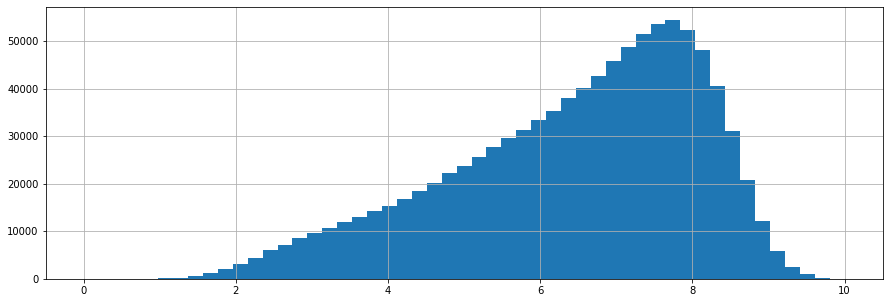

In [10]:
df.toan.hist(bins = 51,figsize = (15,5))

<AxesSubplot:>

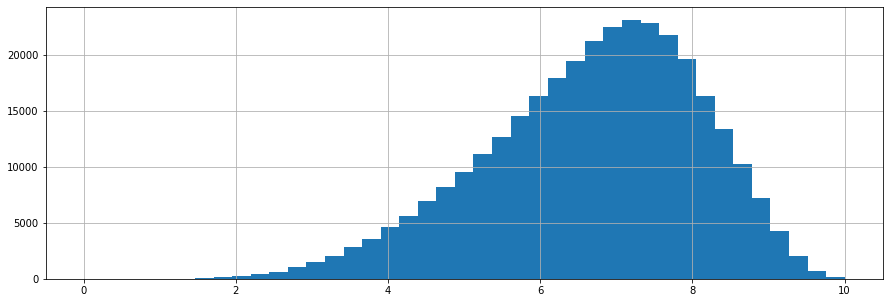

In [11]:
df.vat_li.hist(bins=41, figsize=(15,5))

<AxesSubplot:>

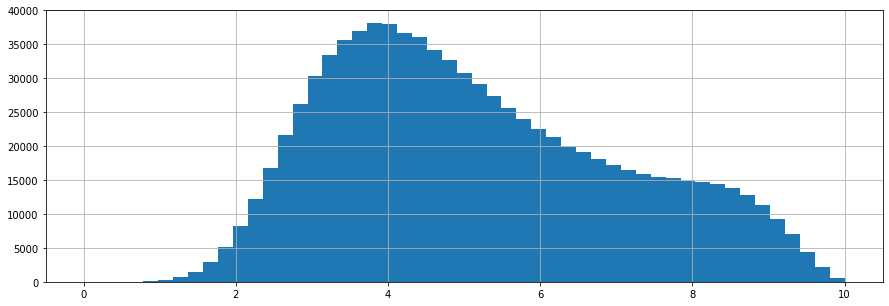

In [12]:
df.ngoai_ngu.hist(bins = 51, figsize = (15,5))

## So sánh phân phối môn Toán của Hà Nội, Hồ Chí Minh và Khánh Hòa

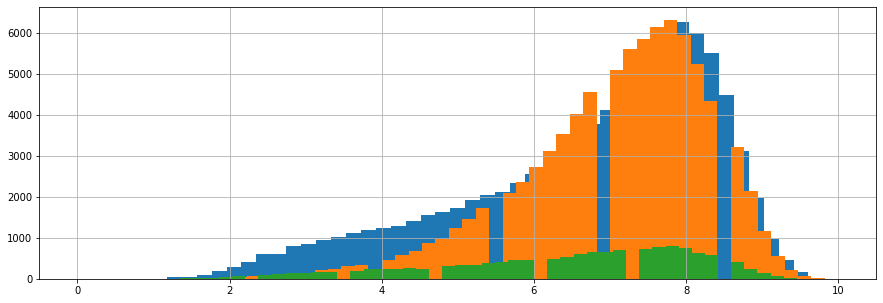

In [13]:
for ma_tinh in ['01', '02', '41']:
    df[df['ma_tinh'] == ma_tinh].toan.hist(bins = 51, figsize = (15,5))

## Tính điểm Khối A00 và A01

In [14]:
def comboundScore(row):
    toan = row.toan
    li = row.vat_li
    hoa = row.hoa_hoc
    anh = row.ngoai_ngu
    
    if pd.notna(toan) is True and pd.notna(li) is True and pd.notna(hoa) is True:
        a00 = toan + li + hoa
    else:
        a00 = np.NaN
        
    if pd.notna(toan) is True and pd.notna(li) is True and pd.notna(anh) is True:
        a01 = toan + li + anh
    else:
        a01 = np.NaN
        
    return a00, a01

In [15]:
df['a00'], df['a01'] = zip(*df.apply(comboundScore, axis=1))

In [16]:
df.head()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_tinh,a00,a01
0,01000001,3.6,5.00,4.0,NaN,NaN,NaN,2.75,6.0,8.75,01,NaN,NaN
1,01000002,8.4,6.75,7.6,NaN,NaN,NaN,8.50,7.5,8.25,01,NaN,NaN
2,01000003,5.8,7.50,5.0,NaN,NaN,NaN,7.25,5.5,8.75,01,NaN,NaN
3,01000004,7.4,7.50,8.6,NaN,NaN,NaN,7.50,6.5,7.50,01,NaN,NaN
4,01000005,7.2,8.50,9.0,NaN,NaN,NaN,8.00,8.5,8.25,01,NaN,NaN


## So sánh phân phối điểm khối A00 và A01 của Hà Nội, Hồ Chí Minh và Khánh Hòa

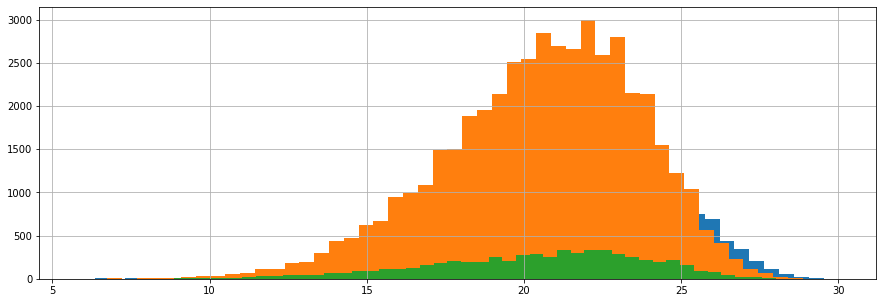

In [17]:
for ma_tinh in ['01', '02', '41']:
    df[df['ma_tinh'] == ma_tinh].a00.hist(bins = 51, figsize = (15,5))

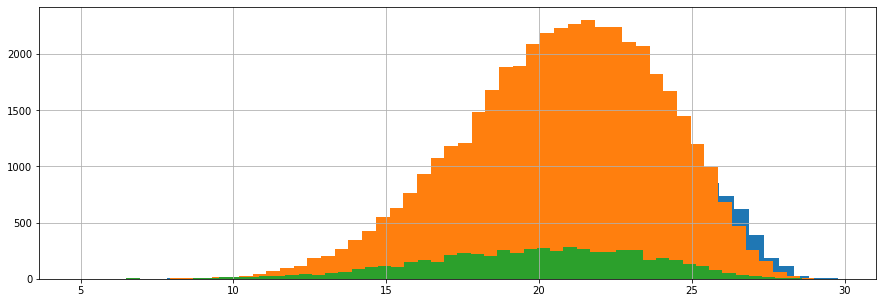

In [18]:
for ma_tinh in ['01', '02', '41']:
    df[df['ma_tinh'] == ma_tinh].a01.hist(bins = 51, figsize = (15,5))

## Lọc bảng dữ liệu của Khánh Hòa

In [19]:
khanh_hoa = df[(df.ma_tinh == '41')]

In [20]:
khanh_hoa

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_tinh,a00,a01
701952,41000001,4.6,6.50,4.8,NaN,NaN,NaN,8.75,8.75,8.50,41,NaN,NaN
701953,41000002,6.4,3.50,4.4,7.00,7.00,7.50,NaN,NaN,NaN,41,20.40,17.80
701954,41000003,3.0,5.75,2.4,NaN,NaN,NaN,5.25,4.50,4.50,41,NaN,NaN
701955,41000004,4.4,5.75,3.2,NaN,NaN,NaN,7.50,5.75,8.25,41,NaN,NaN
701956,41000005,3.6,7.25,3.6,NaN,NaN,NaN,6.00,5.50,8.00,41,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
715972,41014088,6.0,3.25,2.8,NaN,NaN,NaN,5.00,6.00,7.75,41,NaN,NaN
715973,41014089,7.2,6.25,4.8,NaN,NaN,NaN,7.25,7.75,9.25,41,NaN,NaN
715974,41014090,7.8,6.00,4.8,8.00,8.75,5.25,NaN,NaN,NaN,41,24.55,20.60
715975,41014091,7.4,6.50,4.6,8.25,8.25,4.75,NaN,NaN,NaN,41,23.90,20.25


## Function vui vẻ để tính vị trí của thí sinh

In [21]:
def percentage(sbd, khoi):
    thi_sinh = df[df.sbd == sbd]
    diem = thi_sinh[khoi].values[0]
    ma_tinh = thi_sinh.ma_tinh.values[0]
    df_tinh = df[(df.ma_tinh == ma_tinh)]
    ti_le_tinh = len(df_tinh[(df_tinh[khoi] >= diem)]) / len(df_tinh[(df_tinh[khoi] >= 0)])
    ti_le_quoc_gia = len(df[(df[khoi] >= diem)]) / len(df[(df[khoi] >= 0)])
    
    print('''Điểm khối {} của thí sinh {} là: {}. Thuộc top:
    {:%} tỉnh
    {:%} quốc gia'''.format(khoi, sbd, diem, ti_le_tinh, ti_le_quoc_gia))

In [22]:
percentage('41009866', 'a00')

Điểm khối a00 của thí sinh 41009866 là: 26.0. Thuộc top:
    2.289696% tỉnh
    4.022269% quốc gia


In [23]:
percentage('41009866', 'a01')

Điểm khối a01 của thí sinh 41009866 là: 25.95. Thuộc top:
    2.522154% tỉnh
    3.512577% quốc gia
